**Data 602 - Homework Week 9:**

In [19]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
data = '/content/train.tsv'

In [21]:
df = pd.read_csv(data,sep='\t')

In [22]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [23]:
df.shape

(156060, 4)

In [24]:
#  Checking the dataframe for null values
df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [25]:
# Information of the data
df.info

<bound method DataFrame.info of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
...          ...         ...   
156055    156056        8544   
156056    156057        8544   
156057    156058        8544   
156058    156059        8544   
156059    156060        8544   

                                                   Phrase  Sentiment  
0       A series of escapades demonstrating the adage ...          1  
1       A series of escapades demonstrating the adage ...          2  
2                                                A series          2  
3                                                       A          2  
4                                                  series          2  
...                                                   ...        ...  
156055                                          Hearst 's          2  
156056         

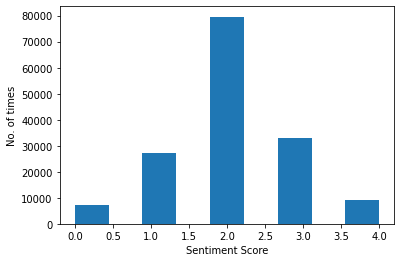

In [26]:
# distribution of review documents.
plt.hist(df['Sentiment'],9)
plt.xlabel("Sentiment Score")
plt.ylabel("No. of times")
plt.show()

In [27]:
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [28]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Phrase'])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.3, random_state=42)

In [30]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted)*100)

MultinomialNB Accuracy: 60.64975009611688


Classification using the CountVector generated 60.64% accuracy.

In [31]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Phrase'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Sentiment'], test_size=0.3, random_state=42)

In [33]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted)*100)

MultinomialNB Accuracy: 58.152847195523094


The accuracy of CountVector is better than that of the TF_IDF as countvector generated the model of accuracy 60.64% and the TD_IDF model generated the model of accuracy 58.15%.